In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import pickle

In [12]:
plt.figure(figsize=(10,6))
style.use('seaborn-poster')
sns.set_style('ticks')

<Figure size 720x432 with 0 Axes>

# Clustering Results

## Determining Optimal K
* Elbow method

In [13]:
with open('Data/pickles/elbow', 'rb') as file:
    clustering_scores = pickle.load(file)

(0.5, 10.0)

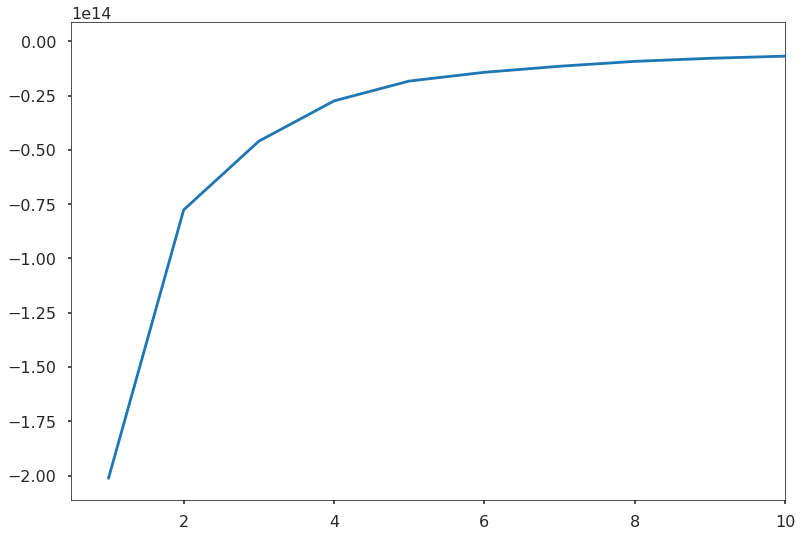

In [16]:
sns.lineplot(x=clustering_scores['clusters'], y=clustering_scores['scores'])
plt.xlim(0.5, 10)

* Seems that 3 clusters is the optimal number for clusters